<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-признаков,-недоступных-в-тестовой-выборке" data-toc-modified-id="Анализ-признаков,-недоступных-в-тестовой-выборке-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Анализ признаков, недоступных в тестовой выборке</a></span></li><li><span><a href="#Проверка-дубликатов" data-toc-modified-id="Проверка-дубликатов-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка дубликатов</a></span></li><li><span><a href="#Проверка-пропусков" data-toc-modified-id="Проверка-пропусков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проверка пропусков</a></span></li><li><span><a href="#Вычисление-эффективности-коэффициента-обогащения-и-сравнение-её-с-изначальным-значением-признака" data-toc-modified-id="Вычисление-эффективности-коэффициента-обогащения-и-сравнение-её-с-изначальным-значением-признака-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Вычисление эффективности коэффициента обогащения и сравнение её с изначальным значением признака</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-изменения-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах:-в-сырье,-в-черновом-концентрате,-в-концентрате-после-первой-очистки-и-в-финальном-концентрате" data-toc-modified-id="Анализ-изменения-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах:-в-сырье,-в-черновом-концентрате,-в-концентрате-после-первой-очистки-и-в-финальном-концентрате-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ изменения концентрация металлов (Au, Ag, Pb) на различных этапах: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате</a></span></li><li><span><a href="#Распределение-гранул-сырья" data-toc-modified-id="Распределение-гранул-сырья-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределение гранул сырья</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Модель-линейной-регрессии" data-toc-modified-id="Модель-линейной-регрессии-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Модель линейной регрессии</a></span></li><li><span><a href="#Модель-дерева-решений" data-toc-modified-id="Модель-дерева-решений-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Модель дерева решений</a></span></li><li><span><a href="#Модель-случайного-дерева" data-toc-modified-id="Модель-случайного-дерева-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Модель случайного дерева</a></span></li><li><span><a href="#Проверка-адекватности-модели" data-toc-modified-id="Проверка-адекватности-модели-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Проверка адекватности модели</a></span></li></ul></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Итоговый вывод</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyRegressor

In [2]:
df_train = pd.read_csv('/datasets/gold_industry_train.csv')
df_test = pd.read_csv('/datasets/gold_industry_test.csv')
df_full = pd.read_csv('/datasets/gold_industry_full.csv')

In [3]:
display(df_train.head(5))
display(df_train.info())

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


None

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

In [5]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


### Анализ признаков, недоступных в тестовой выборке

В тестовом наборе данных нет целевых признаков, то есть столбцов `output`. Также, в тестовой выборке нет параметра `calculation` для `rougher`, так как скорее всего данный параметр рассчитывается после тех. процесса.

### Проверка дубликатов

In [6]:
df_train.duplicated().sum()

0

In [7]:
df_test.duplicated().sum()

0

In [8]:
df_full.duplicated().sum()

0

Дубликатов не обнаружено.

### Проверка пропусков

In [9]:
df_train.isna().sum()

date                       0
rougher.input.feed_au      0
rougher.input.feed_ag      0
rougher.input.feed_pb     72
rougher.input.feed_sol    77
                          ..
final.output.recovery      0
final.output.tail_au       0
final.output.tail_ag       1
final.output.tail_pb      75
final.output.tail_sol      5
Length: 87, dtype: int64

In [10]:
df_test.isna().sum()

date                                            0
rougher.input.feed_au                           0
rougher.input.feed_ag                           0
rougher.input.feed_pb                          28
rougher.input.feed_sol                         22
rougher.input.feed_rate                         4
rougher.input.feed_size                        44
rougher.input.floatbank10_sulfate               3
rougher.input.floatbank10_xanthate              1
rougher.state.floatbank10_a_air                 1
rougher.state.floatbank10_a_level               1
rougher.state.floatbank10_b_air                 1
rougher.state.floatbank10_b_level               1
rougher.state.floatbank10_c_air                 1
rougher.state.floatbank10_c_level               1
rougher.state.floatbank10_d_air                 0
rougher.state.floatbank10_d_level               0
rougher.state.floatbank10_e_air                 7
rougher.state.floatbank10_e_level               0
rougher.state.floatbank10_f_air                 0


In [11]:
df_full.isna().sum()

date                        0
rougher.input.feed_au       0
rougher.input.feed_ag       0
rougher.input.feed_pb     100
rougher.input.feed_sol     99
                         ... 
final.output.recovery       0
final.output.tail_au        0
final.output.tail_ag        1
final.output.tail_pb      101
final.output.tail_sol       6
Length: 87, dtype: int64

В данных наблюдаются пропуски, которые не представляется возможным заполнить самостоятельно без, обращения к источникам информации. В задаче указано, что соседние значения часто могут быть похожи, так что для заполнения пропусков можно использовать соседние значения.

In [12]:
df_cleared_train = df_train.fillna(method='bfill')
df_cleared_test = df_test.fillna(method='bfill')
df_cleared_full = df_full.fillna(method='bfill')

### Вычисление эффективности коэффициента обогащения и сравнение её с изначальным значением признака

Коэффициент рассчитывается по следующей формуле:

![Formulae](https://pictures.s3.yandex.net/resources/Recovery_1576238822.jpg)

где:
- `C` — доля золота в концентрате после флотации/очистки;
- `F` — доля золота в сырье/концентрате до флотации/очистки;
- `T` — доля золота в отвальных хвостах после флотации/очистки.

In [13]:
concentrate_au = df_cleared_train['rougher.output.concentrate_au']
feed_au = df_cleared_train['rougher.input.feed_au']
tail_au = df_cleared_train['rougher.output.tail_au']
input_recovery = df_cleared_train['rougher.output.recovery']

calc_recovery = ((concentrate_au * (feed_au - tail_au)) / (feed_au * (concentrate_au - tail_au))) * 100
print('Эффективность обогащения концентрата:', calc_recovery)
print('Абсолютная средняя ошибка:', mean_absolute_error(input_recovery, calc_recovery))

Эффективность обогащения концентрата: 0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14574    87.684717
14575    90.677361
14576    89.574376
14577    87.724007
14578    88.890579
Length: 14579, dtype: float64
Абсолютная средняя ошибка: 9.83758577644259e-15


`MAE` имеет малое отклонение, что говорит о том, что изначально коэффициент эффективности был рассчитан верно.

**Промежуточный вывод:**
- Дубликатов не было найдено
- Были устранены пропущенные значения в датасетах
- Был рассчитан `MAE`. Оно имеет малое отклонение, что говорит о том, что изначально коэффициент эффективности был рассчитан верно.

## Анализ данных

### Анализ изменения концентрация металлов (Au, Ag, Pb) на различных этапах: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате

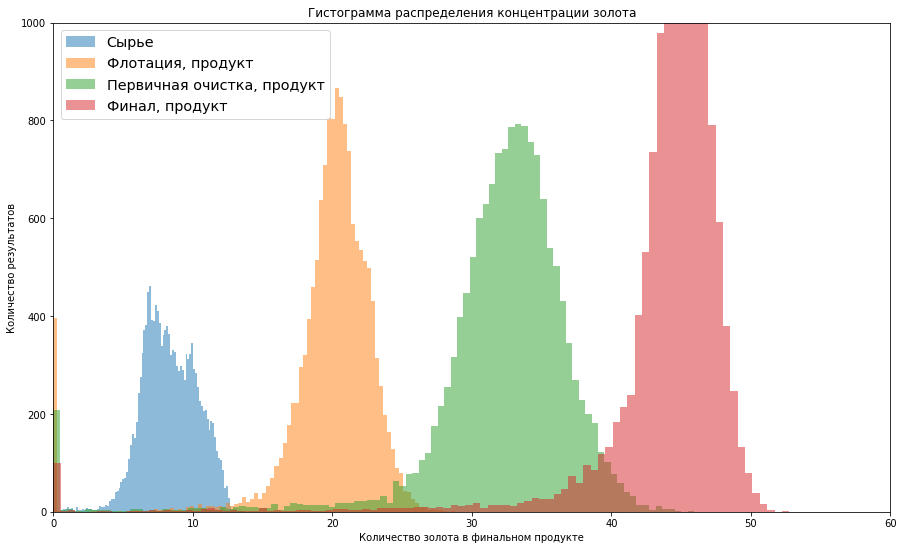

In [14]:
plt.figure(figsize=[15,9])

plt.hist(df_cleared_train['rougher.input.feed_au'], bins=100, label='Сырье', alpha=.5)
plt.hist(df_cleared_train['rougher.output.concentrate_au'], bins=100, label='Флотация, продукт', alpha=.5)
plt.hist(df_cleared_train['primary_cleaner.output.concentrate_au'], bins=100, label='Первичная очистка, продукт', alpha=.5)
plt.hist(df_cleared_train['final.output.concentrate_au'], bins=100, label='Финал, продукт', alpha=.5)

plt.xlim([0, 60])
plt.ylim([0, 1000])

plt.xlabel('Количество золота в финальном продукте')
plt.ylabel('Количество результатов')

plt.legend(loc='upper left', fontsize='x-large')
plt.title('Гистограмма распределения концентрации золота')

plt.show();

Из гистограммы видно, что концентрация золота повышается с каждым этапом. То бишь, с помощью флотации мы увеличиваем концентрацию золота.

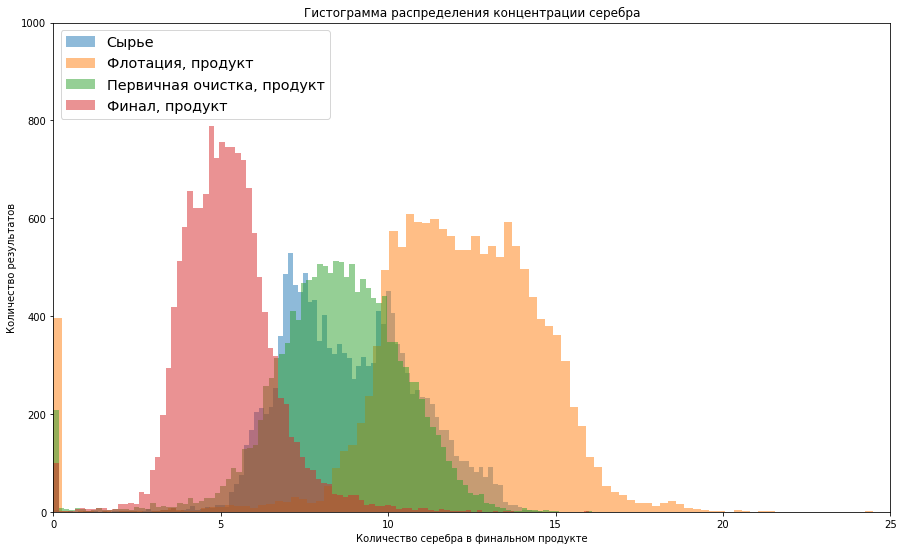

In [15]:
plt.figure(figsize=[15,9])

plt.hist(df_cleared_train['rougher.input.feed_ag'], bins=100, label='Сырье', alpha=.5)
plt.hist(df_cleared_train['rougher.output.concentrate_ag'], bins=100, label='Флотация, продукт', alpha=.5)
plt.hist(df_cleared_train['primary_cleaner.output.concentrate_ag'], bins=100, label='Первичная очистка, продукт', alpha=.5)
plt.hist(df_cleared_train['final.output.concentrate_ag'], bins=100, label='Финал, продукт', alpha=.5)

plt.xlim([0, 25])
plt.ylim([0, 1000])

plt.xlabel('Количество серебра в финальном продукте')
plt.ylabel('Количество результатов')

plt.legend(loc='upper left', fontsize='x-large')
plt.title('Гистограмма распределения концентрации серебра')

plt.show();

С каждым этапом концентрация серебра понижается. Скорее всего, это может происходить из-за того, что нас интересует только золота и в процессе очищения другие металлы отделяются от сплава.

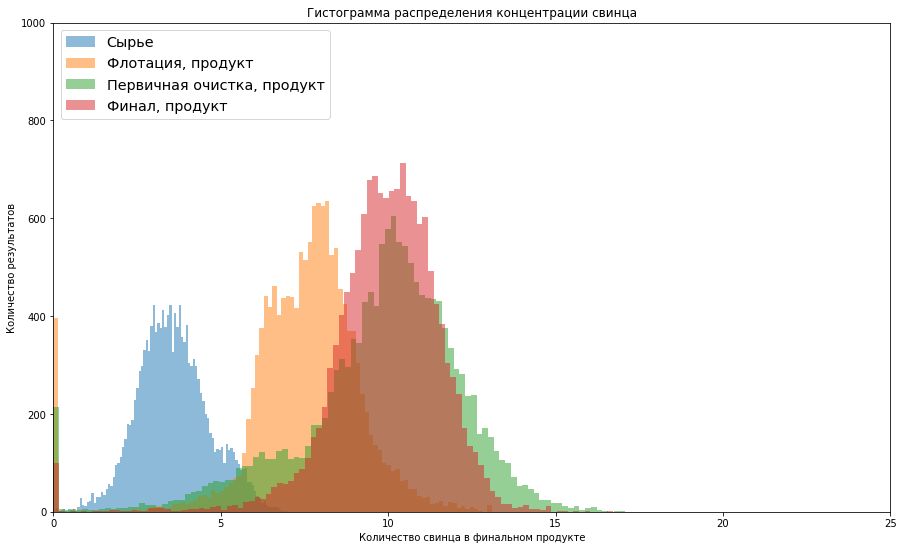

In [16]:
plt.figure(figsize=[15,9])

plt.hist(df_cleared_train['rougher.input.feed_pb'], bins=100, label='Сырье', alpha=.5)
plt.hist(df_cleared_train['rougher.output.concentrate_pb'], bins=100, label='Флотация, продукт', alpha=.5)
plt.hist(df_cleared_train['primary_cleaner.output.concentrate_pb'], bins=100, label='Первичная очистка, продукт', alpha=.5)
plt.hist(df_cleared_train['final.output.concentrate_pb'], bins=100, label='Финал, продукт', alpha=.5)

plt.xlim([0, 25])
plt.ylim([0, 1000])

plt.xlabel('Количество свинца в финальном продукте')
plt.ylabel('Количество результатов')

plt.legend(loc='upper left', fontsize='x-large')
plt.title('Гистограмма распределения концентрации свинца')

plt.show();

На гистограмме видно, что концентрация свинца с течением этапов значительно не меняется.

На гистограммах видно достаточно большое количество аномалий. Очень много значений в нулевом диапазоне. Обработаем их.

In [17]:
print(df_cleared_train[df_cleared_train['rougher.output.concentrate_au'] < 1]['rougher.output.concentrate_au'].count())
print(df_cleared_train[df_cleared_train['rougher.output.concentrate_ag'] < 1]['rougher.output.concentrate_ag'].count())
print(df_cleared_train[df_cleared_train['rougher.output.concentrate_pb'] < 1]['rougher.output.concentrate_pb'].count())
print(df_cleared_train[df_cleared_train['rougher.output.concentrate_sol'] < 1]['rougher.output.concentrate_sol'].count())

398
399
401
398


In [18]:
df_cleared_train = df_cleared_train.drop(df_cleared_train[df_cleared_train['rougher.output.concentrate_au'] < 1].index)
df_cleared_train = df_cleared_train.drop(df_cleared_train[df_cleared_train['rougher.output.concentrate_ag'] < 1].index)
df_cleared_train = df_cleared_train.drop(df_cleared_train[df_cleared_train['rougher.output.concentrate_pb'] < 1].index)
df_cleared_train = df_cleared_train.drop(df_cleared_train[df_cleared_train['rougher.output.concentrate_sol'] < 1].index)

In [19]:
print(df_cleared_train[df_cleared_train['rougher.output.concentrate_au'] < 1]['rougher.output.concentrate_au'].count())
print(df_cleared_train[df_cleared_train['rougher.output.concentrate_ag'] < 1]['rougher.output.concentrate_ag'].count())
print(df_cleared_train[df_cleared_train['rougher.output.concentrate_pb'] < 1]['rougher.output.concentrate_pb'].count())
print(df_cleared_train[df_cleared_train['rougher.output.concentrate_sol'] < 1]['rougher.output.concentrate_sol'].count())

0
0
0
0


In [20]:
print(df_cleared_train[df_cleared_train['primary_cleaner.output.concentrate_au'] < 1]['primary_cleaner.output.concentrate_au'].count())
print(df_cleared_train[df_cleared_train['primary_cleaner.output.concentrate_ag'] < 1]['primary_cleaner.output.concentrate_ag'].count())
print(df_cleared_train[df_cleared_train['primary_cleaner.output.concentrate_pb'] < 1]['primary_cleaner.output.concentrate_pb'].count())
print(df_cleared_train[df_cleared_train['primary_cleaner.output.concentrate_sol'] < 1]['primary_cleaner.output.concentrate_sol'].count())

207
232
230
277


In [21]:
df_cleared_train = df_cleared_train.drop(df_cleared_train[df_cleared_train['primary_cleaner.output.concentrate_au'] < 1].index)
df_cleared_train = df_cleared_train.drop(df_cleared_train[df_cleared_train['primary_cleaner.output.concentrate_ag'] < 1].index)
df_cleared_train = df_cleared_train.drop(df_cleared_train[df_cleared_train['primary_cleaner.output.concentrate_pb'] < 1].index)
df_cleared_train = df_cleared_train.drop(df_cleared_train[df_cleared_train['primary_cleaner.output.concentrate_sol'] < 1].index)

In [22]:
print(df_cleared_train[df_cleared_train['primary_cleaner.output.concentrate_au'] < 1]['primary_cleaner.output.concentrate_au'].count())
print(df_cleared_train[df_cleared_train['primary_cleaner.output.concentrate_ag'] < 1]['primary_cleaner.output.concentrate_ag'].count())
print(df_cleared_train[df_cleared_train['primary_cleaner.output.concentrate_pb'] < 1]['primary_cleaner.output.concentrate_pb'].count())
print(df_cleared_train[df_cleared_train['primary_cleaner.output.concentrate_sol'] < 1]['primary_cleaner.output.concentrate_sol'].count())

0
0
0
0


In [23]:
print(df_cleared_train[df_cleared_train['final.output.concentrate_au'] < 1]['final.output.concentrate_au'].count())
print(df_cleared_train[df_cleared_train['final.output.concentrate_ag'] < 1]['final.output.concentrate_ag'].count())
print(df_cleared_train[df_cleared_train['final.output.concentrate_pb'] < 1]['final.output.concentrate_pb'].count())
print(df_cleared_train[df_cleared_train['final.output.concentrate_sol'] < 1]['final.output.concentrate_sol'].count())

88
100
90
132


In [24]:
df_cleared_train = df_cleared_train.drop(df_cleared_train[df_cleared_train['final.output.concentrate_au'] < 1].index)
df_cleared_train = df_cleared_train.drop(df_cleared_train[df_cleared_train['final.output.concentrate_ag'] < 1].index)
df_cleared_train = df_cleared_train.drop(df_cleared_train[df_cleared_train['final.output.concentrate_pb'] < 1].index)
df_cleared_train = df_cleared_train.drop(df_cleared_train[df_cleared_train['final.output.concentrate_sol'] < 1].index)

In [25]:
print(df_cleared_train[df_cleared_train['final.output.concentrate_au'] < 1]['final.output.concentrate_au'].count())
print(df_cleared_train[df_cleared_train['final.output.concentrate_ag'] < 1]['final.output.concentrate_ag'].count())
print(df_cleared_train[df_cleared_train['final.output.concentrate_pb'] < 1]['final.output.concentrate_pb'].count())
print(df_cleared_train[df_cleared_train['final.output.concentrate_sol'] < 1]['final.output.concentrate_sol'].count())

0
0
0
0


### Распределение гранул сырья

Распределение нормальное, со смещением влево. На гистограмме видно, что распределения на обеих выборках похожи.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку❌:</b>
1. Сверься с условием и удали из исследования лишний этап.
2. Цель исследлвания - не проверить нормальность распределения, а оценить схожесть распределения между выборками.
3. Здесь мы имеем дело с непрерывной величиной - для анализа её распределения стоит использовать нормированную гистограмму (например, `shs.histplot()` с параметром `stat='density'` или `sns.kdeplot()`): гистограммы такого типа позволяют нивелировать разницу в размерах выборок при анализе распределений. Обрати также внимание, что при использовании нормированных гистограмм по оси Y будет уже не частота значений, а плотность распределения.

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Исправил вывод и удалил лишний этап.
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Учтено.

In [27]:
rougher_input_sum = (df_cleared_train['rougher.input.feed_au'] + df_cleared_train['rougher.input.feed_ag'] +
                    df_cleared_train['rougher.input.feed_pb'] + df_cleared_train['rougher.input.feed_sol'])
rouger_output_sum = (df_cleared_train['rougher.output.concentrate_au'] + df_cleared_train['rougher.output.concentrate_ag'] +
                    df_cleared_train['rougher.output.concentrate_pb'] + df_cleared_train['rougher.output.concentrate_sol'])
primary_cleaner_output_sum = (df_cleared_train['primary_cleaner.output.concentrate_au'] + 
                              df_cleared_train['primary_cleaner.output.concentrate_ag'] +
                              df_cleared_train['primary_cleaner.output.concentrate_pb'] +
                              df_cleared_train['primary_cleaner.output.concentrate_sol'])
final_output_sum = (df_cleared_train['final.output.concentrate_au'] + df_cleared_train['final.output.concentrate_ag'] +
                    df_cleared_train['final.output.concentrate_pb'] + df_cleared_train['final.output.concentrate_sol'])

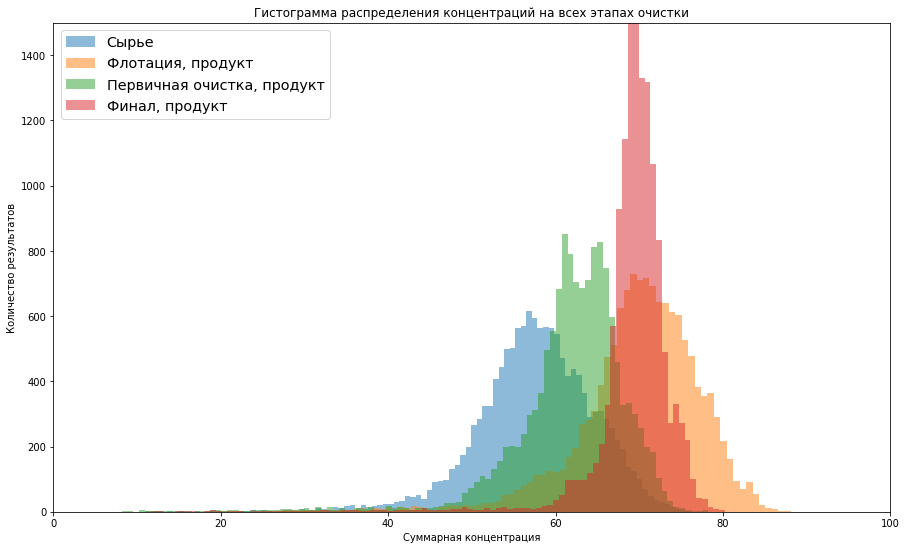

In [28]:
plt.figure(figsize=[15,9])

plt.hist(rougher_input_sum, bins=100, label='Сырье', alpha=.5)
plt.hist(rouger_output_sum, bins=100, label='Флотация, продукт', alpha=.5)
plt.hist(primary_cleaner_output_sum, bins=100, label='Первичная очистка, продукт', alpha=.5)
plt.hist(final_output_sum, bins=100, label='Финал, продукт', alpha=.5)

plt.xlim([0, 100])
plt.ylim([0, 1500])

plt.xlabel('Суммарная концентрация')
plt.ylabel('Количество результатов')

plt.legend(loc='upper left', fontsize='x-large')
plt.title('Гистограмма распределения концентраций на всех этапах очистки')

plt.show();

Из гистограммы видно, что суммарная концентрация больше в исходном сырье, однако количество финального сырья намного выше, чем на остальных этапах.

In [29]:
rougher_input_sum = (df_cleared_train['rougher.input.feed_au'] + df_cleared_train['rougher.input.feed_ag'] +
                    df_cleared_train['rougher.input.feed_pb'] + df_cleared_train['rougher.input.feed_sol'])

rouger_output_sum = (df_cleared_train['rougher.output.concentrate_au'] + df_cleared_train['rougher.output.concentrate_ag'] +
                    df_cleared_train['rougher.output.concentrate_pb'] + df_cleared_train['rougher.output.concentrate_sol'])

primary_cleaner_output_sum = (df_cleared_train['primary_cleaner.output.concentrate_au'] + 
                              df_cleared_train['primary_cleaner.output.concentrate_ag'] +
                              df_cleared_train['primary_cleaner.output.concentrate_pb'] +
                              df_cleared_train['primary_cleaner.output.concentrate_sol'])

final_output_sum = (df_cleared_train['final.output.concentrate_au'] + df_cleared_train['final.output.concentrate_ag'] +
                    df_cleared_train['final.output.concentrate_pb'] + df_cleared_train['final.output.concentrate_sol'])

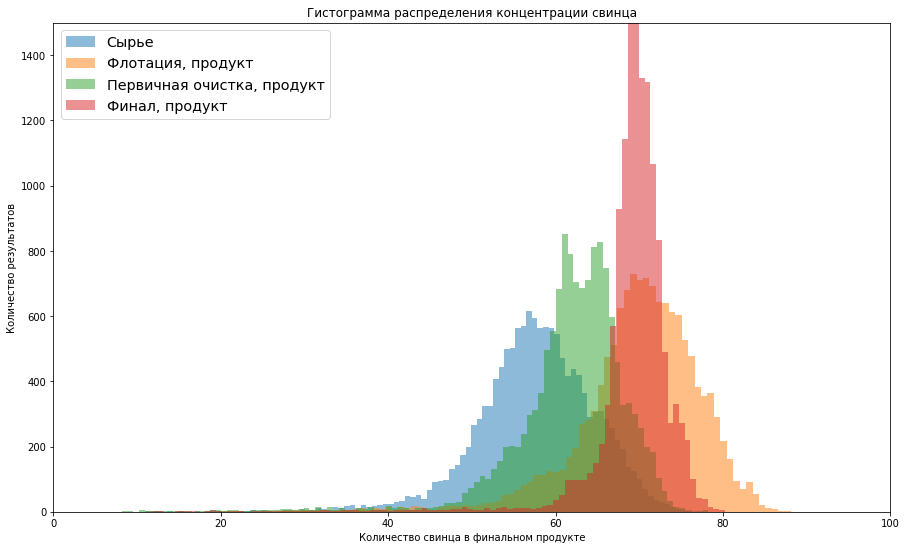

In [30]:
plt.figure(figsize=[15,9])

plt.hist(rougher_input_sum, bins=100, label='Сырье', alpha=.5)
plt.hist(rouger_output_sum, bins=100, label='Флотация, продукт', alpha=.5)
plt.hist(primary_cleaner_output_sum, bins=100, label='Первичная очистка, продукт', alpha=.5)
plt.hist(final_output_sum, bins=100, label='Финал, продукт', alpha=.5)

plt.xlim([0, 100])
plt.ylim([0, 1500])

plt.xlabel('Количество свинца в финальном продукте')
plt.ylabel('Количество результатов')

plt.legend(loc='upper left', fontsize='x-large')
plt.title('Гистограмма распределения концентрации свинца')

plt.show();

**Промежуточный вывод:**

- Концентрация золота повышается с каждым этапом. То бишь, с помощью флотации мы увеличиваем концентрацию золота.
- С каждым этапом концентрация серебра понижается. Скорее всего, это может происходить из-за того, что нас интересует только золота и в процессе очищения другие металлы отделяются от сплава.
- Концентрация свинца с течением этапов значительно не меняется.
- Распределение данных в обучающей и тренировочной выборке нормально.
- Были найдены и устранены аномальные данные

## Модель

Формула sMAPE

![sMAPE](https://pictures.s3.yandex.net/resources/smape_1576239058.jpg)

Формула итогового sMAPE

![final_sMAPE](https://pictures.s3.yandex.net/resources/_smape_1576239054.jpg)

In [143]:
def sMAPE(y_true, y_pred):
    error = np.mean(abs(y_true - y_pred) / ((abs(y_true) + abs(y_pred)) / 2))
    return error * 100

In [144]:
def final_sMAPE(sMAPE_rougher, sMAPE_final):
    return 0.25 * sMAPE_rougher + 0.75 * sMAPE_final

In [145]:
features_columns = df_cleared_test.columns[1:]

features_rougher_columns = set(features_columns[0:22])
features_final_columns = set(features_columns)

target_columns = ['rougher.output.recovery', 'final.output.recovery']

features_final_train = df_cleared_train.drop(set(df_cleared_train.columns) - features_final_columns, axis=1)
features_rougher_train = features_final_train.drop(set(features_final_train.columns) - features_rougher_columns, axis=1)

target_train = df_cleared_train[target_columns]

In [146]:
smape_scorer = make_scorer(sMAPE, greater_is_better=False)

### Модель линейной регрессии

In [147]:
model = LinearRegression()

scores = cross_val_score(model, features_rougher_train, target_train['rougher.output.recovery'], scoring=smape_scorer, cv=5)
smape_rougher = np.mean(abs(scores))

print('Средняя оценка sMAPE rougher:', smape_rougher)

Средняя оценка sMAPE rougher: 6.452615032767272


In [148]:
model = LinearRegression()

scores = cross_val_score(model, features_final_train, target_train['final.output.recovery'], scoring=smape_scorer, cv=5)
smape_final = np.mean(abs(scores))

print('Средняя оценка sMAPE final:', smape_final)

Средняя оценка sMAPE final: 9.440220500927762


In [149]:
print('Финальная оценка sMAPE линейной регрессии:', final_sMAPE(smape_rougher, smape_final))

Финальная оценка sMAPE линейной регрессии: 8.69331913388764


### Модель дерева решений

In [150]:
%%time
model_dt = make_pipeline(StandardScaler(), DecisionTreeRegressor())

CPU times: user 153 µs, sys: 19 µs, total: 172 µs
Wall time: 178 µs


In [153]:
params = {'decisiontreeregressor__max_depth': [None] + [i for i in range(2, 7)],
          'decisiontreeregressor__random_state': [12345]}

In [154]:
grid_dt_search_rougher = GridSearchCV(model_dt, params, scoring=smape_scorer, cv=5)
grid_dt_search_rougher.fit(features_rougher_train, target_train['rougher.output.recovery'])

dt_smape_rougher = abs(round(grid_dt_search_rougher.best_score_, 3))

grid_dt_search_final = GridSearchCV(model_dt, params, scoring=smape_scorer, cv=5)
grid_dt_search_final.fit(features_final_train, target_train['final.output.recovery'])

dt_smape_final = abs(round(grid_dt_search_final.best_score_, 3))

print('Финальная оценка sMAPE дерева решений:', final_sMAPE(dt_smape_rougher, dt_smape_final))

Финальная оценка sMAPE дерева решений: 8.055


### Модель случайного дерева

In [40]:
%%time
model_rf = make_pipeline(StandardScaler(), RandomForestRegressor())

params = {'randomforestregressor__max_depth': [2, 5, 10],
          'randomforestregressor__n_estimators': [150, 200, 250],

grid_rf_search_rougher = GridSearchCV(model_rf, params, scoring=smape_scorer, cv=5, n_jobs=-1)
grid_rf_search_rougher.fit(features_rougher_train, target_train['rougher.output.recovery'])

rf_smape_rougher = abs(round(grid_rf_search_rougher.best_score_, 3))

CPU times: user 11min 1s, sys: 503 ms, total: 11min 2s
Wall time: 11min 2s


In [41]:
%%time
grid_rf_search_final = GridSearchCV(model_rf, params, scoring=smape_scorer, cv=5, n_jobs=-1)
grid_rf_search_final.fit(features_final_train, target_train['final.output.recovery'])

rf_smape_final = abs(round(grid_rf_search_final.best_score_, 3))

print('Финальная оценка sMAPE случайного дерева:', final_sMAPE(rf_smape_rougher, rf_smape_final))

Финальная оценка sMAPE случайного дерева: 7.9515
CPU times: user 25min 45s, sys: 732 ms, total: 25min 45s
Wall time: 25min 46s


In [46]:
# {'randomforestregressor__max_depth': 10, 'randomforestregressor__n_estimators': 100}
# {'randomforestregressor__max_depth': 1, 'randomforestregressor__n_estimators': 5}

best_model_dict = {
    'linear_regression': [smape_rougher, smape_final, final_sMAPE(smape_rougher, smape_final)],
    'decision_tree': [dt_smape_rougher, dt_smape_final, final_sMAPE(dt_smape_rougher, dt_smape_final)],
    'random_forest': [rf_smape_rougher, rf_smape_final, final_sMAPE(rf_smape_rougher, rf_smape_final)]
}

best_model_df = pd.DataFrame(best_model_dict, index=['rougher', 'final', 'final_sMAPE'])
best_model_df

,linear_regression,decision_tree,random_forest
rougher,6.452615,6.213,5.8440
final,9.440221,8.941,8.6540
final_sMAPE,8.693319,8.259,7.9515


Исходя из расчётов, с данными лучше всего справляется алгоритм случайного леса, так как имеет наименьший процент ошибок. Его и будем использовать в дальнейшем.

In [57]:
features_test = df_cleared_test.drop('date', axis=1)
features_test_rougher = features_test.drop(set(features_test.columns) - features_rougher_columns, axis=1)

test_frame_target = \
df_cleared_test.merge(df_cleared_full.loc[:, ['date', 'rougher.output.recovery', 'final.output.recovery']], on='date')

target_test_rougher = test_frame_target['rougher.output.recovery']
target_test_final = test_frame_target['final.output.recovery']

In [52]:
test_pred_rougher = grid_rf_search_rougher.predict(features_test_rougher)
test_pred_rougher_smape = sMAPE(target_test_rougher, test_pred_rougher)

test_pred_final = grid_rf_search_final.predict(features_test)
test_pred_final_smape = sMAPE(target_test_final, test_pred_final)

print('Итоговая оценка sMAPE:', round(final_sMAPE(test_pred_rougher_smape, test_pred_final_smape), 2))

Итоговая оценка sMAPE: 7.39


### Проверка адекватности модели

In [61]:
dummy_regressor_rougher = DummyRegressor(strategy='median')
dummy_regressor_rougher.fit(features_rougher_train, target_train['rougher.output.recovery'])
dummy_regressor_rougher_pred = dummy_regressor_rougher.predict(features_test_rougher)

smape_dummy_rougher = sMAPE(target_test_rougher, dummy_regressor_rougher_pred)

dummy_regressor_final = DummyRegressor(strategy='median')
dummy_regressor_final.fit(features_final_train, target_train['final.output.recovery'])
dummy_regressor_final_pred = dummy_regressor_final.predict(features_test)

smape_dummy_final = sMAPE(target_test_final, dummy_regressor_final_pred)

print('Итоговая оценка константной модели:', round(final_sMAPE(smape_dummy_rougher, smape_dummy_final), 2))

Итоговая оценка константной модели: 8.29


**Промежуточный вывод:**
- Итоговый алгоритм построенё на базе `RandomForestRegressor`
- Итоговый алгоритм имеет ошибку на тестовой выборке - **7.39%**, на константной - **8.29%**

## Итоговый вывод

1. Подготовка данных
- Дубликатов не было найдено
- Были устранены пропущенные значения в датасетах
- Был рассчитан `MAE`. Оно имеет малое отклонение, что говорит о том, что изначально коэффициент эффективности был рассчитан верно.
2. Анализ данных
- Концентрация золота повышается с каждым этапом. То бишь, с помощью флотации мы увеличиваем концентрацию золота.
- С каждым этапом концентрация серебра понижается. Скорее всего, это может происходить из-за того, что нас интересует только золота и в процессе очищения другие металлы отделяются от сплава.
- Концентрация свинца с течением этапов значительно не меняется.
- Распределение данных в обучающей и тренировочной выборке нормально.
- Были найдены и устранены аномальные данные
3. Модель
- Итоговый алгоритм построенё на базе `RandomForestRegressor`
- Итоговый алгоритм имеет ошибку на тестовой выборке - **7.39%**, на константной - **8.29%**